In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
# import plot_is

In [4]:
cp ../Larson_is/plot_is.py .

In [5]:
import plot_is

In [7]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin


fc.nml

Setup the customed radius and boxsize

This is according to Foster and Chevalier's $\xi$ = 0 to $\xi=100$ as expected there is a large unnecessarily empty grid . For the cloud $\xi$ =  6.451


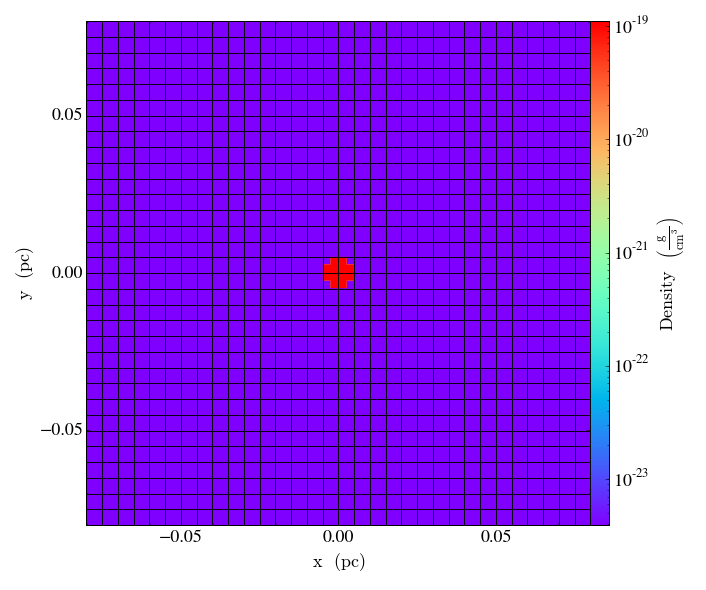

In [218]:
plot_is.plot_time_slice("density",1)

level 6 always gives you a 32x32 grid

~~Also, boxsize is not in code units, but some weird thing, because cloud radius is 12 code units but box is 10 here, and it still fits~~

boxsize =20 


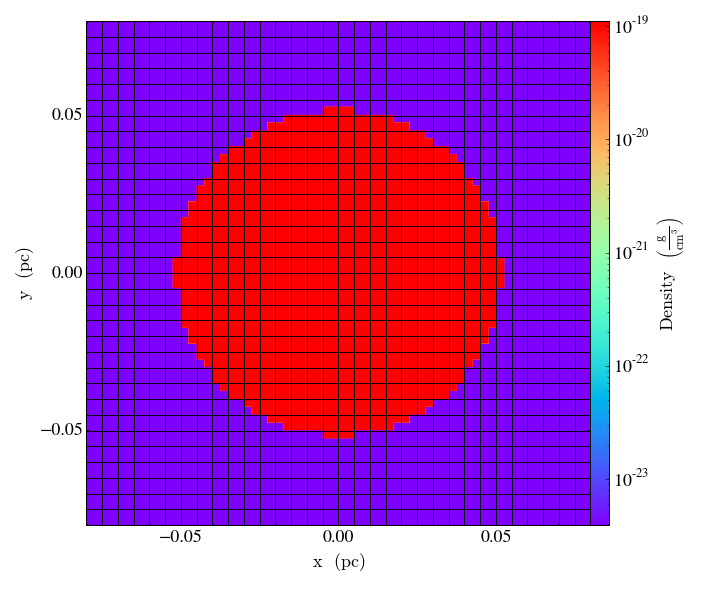

In [219]:
plot_is.plot_time_slice("density",1)

So I changed this back to a more reasonable boxsize of 10 

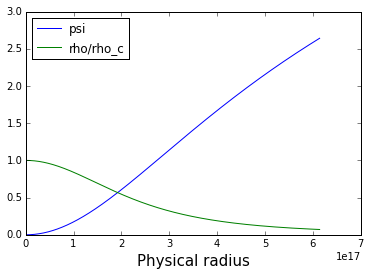

In [257]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [46]:
6e17/32

1.875e+16

In [84]:
rho.shape

(646,)

In [85]:
646/32

20

In [90]:
r = 3.5
dr = 0.01
x = 3.5/dr


350.0


In [104]:
rho.shape

(646,)

In [108]:
rho[370]

0.24115046398993539

In [212]:
np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N)

array([-15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,
        -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,
         2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,
        11.5,  12.5,  13.5,  14.5,  15.5])

Polar plotting code from [this notebook](https://github.com/dorislee0309/usrp/blob/master/notes/Week2/07_01_2015.ipynb)

In [262]:
rho_c = 0.02806 #[1.1e-19 from Larson's paper in code units]
N = 32
xmax=32
ymax=32
img = np.zeros((xmax,ymax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        r = np.sqrt(x**2+y**2)
        #theta = np.arctan(y/x) 
        if (r<xi_max):
#             rho_i=5
            dr = 0.01
            xi = int(r/dr)
            #print r,xi
            rho_i =rho[xi]*rho_c
            #print r, xi,rho_i
        else:
            rho_i = 1.0e-6
        img[x+xmax/2][y+ymax/2]=rho_i

In [263]:
img[np.where(img!=1e-6)]

array([ 0.00234253,  0.00268823,  0.00289808,  0.00289808,  0.00268823,
        0.00234253,  0.0020683 ,  0.00268823,  0.00341448,  0.00408939,
        0.00453095,  0.00453095,  0.00408939,  0.00341448,  0.00268823,
        0.0020683 ,  0.00268823,  0.00373303,  0.00503164,  0.0064346 ,
        0.00737626,  0.00737626,  0.0064346 ,  0.00503164,  0.00373303,
        0.00268823,  0.00234253,  0.00341448,  0.00503164,  0.00737626,
        0.01015067,  0.0122763 ,  0.0122763 ,  0.01015067,  0.00737626,
        0.00503164,  0.00341448,  0.00234253,  0.00268823,  0.00408939,
        0.0064346 ,  0.01015067,  0.01513491,  0.01935989,  0.01935989,
        0.01513491,  0.01015067,  0.0064346 ,  0.00408939,  0.00268823,
        0.00289808,  0.00453095,  0.00737626,  0.0122763 ,  0.01935989,
        0.02590974,  0.02590974,  0.01935989,  0.0122763 ,  0.00737626,
        0.00453095,  0.00289808,  0.00289808,  0.00453095,  0.00737626,
        0.0122763 ,  0.01935989,  0.02590974,  0.02590974,  0.01

<matplotlib.colorbar.Colorbar instance at 0x2b1e6ec49b00>

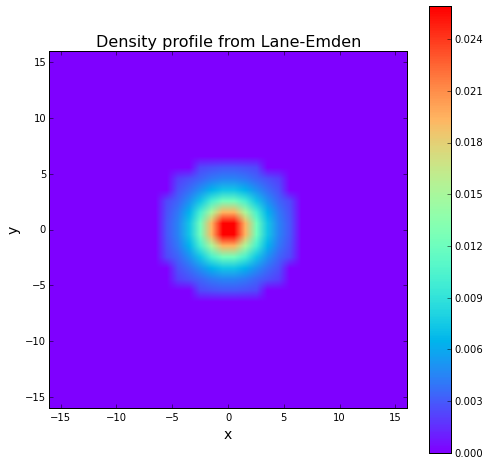

In [264]:
#from matplotlib.colors import LogNorm
plt.figure(figsize=(8,8))
im = plt.imshow(img,cmap="rainbow")#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax/2,xmax/2,-ymax/2,ymax/2])
plt.title("Density profile from Lane-Emden".format(q),fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.colorbar()

In [284]:
32**2

1024

In [285]:
img = img.flatten()

In [286]:
img.shape

(1024,)

In [287]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",img)

In [280]:
img[np.where((np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")==img)!=False)]

array([  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06])

In [274]:
bob = np.array([[1,2],[3,4]])
np.savetxt("../patch/hydro/isothermal_sphere/bob.txt",bob)
bob

array([[1, 2],
       [3, 4]])

In [270]:
np.savetxt?

The r cloud boundary cutoff is still kind of weird (wrong $\xi$ units) but I'll fix this later.

got the test.f90 to print out density.txt but not sure why id doesn't work with the condinit.f90